<a href="https://colab.research.google.com/github/panditadata/Another-WorldBank-With-A-Little-Bit-Of-Spice/blob/main/World_Bank_Education_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Another WorldBank Project... Add a Little Bit of Spice

##Table of Contents

[Coursera Project to calculate basic statistics of a World Bank Dataset](https://coursera.org) with enhancements and further analysis (spice)

The indicator selected to do all the stats calculation is % Unemployment for Females (WorldWide)

Finally, the indicator data is displayed using folium choropleth

##Steps
Download data, upload data, read data into pandas

Cleaning the data by sorting and merging 2 data sets and dropping unnecessary columns

Selecting 1 indicator

Merging 2 data sets: % Unemployment and income group by country

Removing all the NAN values and countries without values

Calculating main stats of the data set (mean, std, quartiles)

Transpose the data year column, income groups as index

Display mean % Female Unemployment by Income Group and Year

Display mean % Female Unemployment by Region

ANOVA Calculation Step by Step, using sci-kit and Pingouin

Data is display by using Folium Choropleth

#World Bank Education Data Analysis

##Intro to Python


In [1]:
print("World Bank")
print(5)
print(5.5)
print(True)


World Bank
5
5.5
True


##Loading the Data


Data taken from [World Bank Repository](https://https://data.worldbank.org/topic/education?cid=EXT_TWBN_D_EXT)

###Read data into pandas

In [ ]:
import pandas as pd

main_data = pd.read_csv("/content/API_4_DS2_en_csv_v2_1741864.csv", skiprows= 4)
main_data.head()

# New Section

In [ ]:
import pandas as pd

country_data=pd.read_csv("/content/Metadata_Country_API_4_DS2_en_csv_v2_1741864.csv")
country_data.head()

###Exploring the data

In [ ]:
main_data.columns

###All indicators are displayed.
### For this project the indicator "Unemployment, female (% of female labor force) (modeled ILO estimate)" is selected.

In [ ]:
main_data['Indicator Name'].unique()

###How to select only the data in regards to selected indicator
### Operator == is functioning as a comparison  and check each column that has the required indicator 

In [ ]:
main_data_unem=main_data[main_data['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_unem.head()

### Reliable data has only been recorded after 1991
### Columns from years 1991 to 2020 have been selected

In [ ]:
main_data_unem= main_data_unem[['Country Name', 'Country Code','1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
main_data_unem.head()

###Exploring the dataset country_data
###Displaying the columns

In [ ]:
country_data.columns

###Selecting the columns 'Country Code', 'Region', 'IncomeGroup'

In [ ]:
country_data.columns
country_data=country_data[['Country Code', 'Region', 'IncomeGroup']]
country_data.head()


### Merging datasets on the common column  'Country Code'  for both datasets

In [ ]:
merged_data = pd.merge(main_data_unem, country_data, on='Country Code')
merged_data.head()

###Displaying what are the columns of merged_data

In [ ]:
merged_data.columns

###Displaying the new dataset merged_data

In [ ]:
merged_data=merged_data[['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Region',
       'IncomeGroup']]
merged_data.head()

#Exploratory Data Analysis
###Removing all the NAN


### isna() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values.

In [ ]:

merged_data.isna()

Country Name  Country Code   1991  ...   2020  Region  IncomeGroup
0           False         False   True  ...   True   False        False
1           False         False  False  ...  False   False        False
2           False         False  False  ...  False   False        False
3           False         False  False  ...  False   False        False
4           False         False   True  ...   True   False        False
..            ...           ...    ...  ...    ...     ...          ...
258         False         False   True  ...   True   False        False
259         False         False  False  ...  False   False        False
260         False         False  False  ...  False   False        False
261         False         False  False  ...  False   False        False
262         False         False  False  ...  False   False        False

[263 rows x 34 columns]

###Adding all the isna() True values it will allow us to see that many of the countries dont have data for specific years. 

In [ ]:
merged_data.isna().sum().head()


Country Name     0
Country Code     0
1991            30
1992            30
1993            30
dtype: int64

The shape of merged_data

In [ ]:
merged_data.isna().shape

(263, 34)

### All the Nan values are removed with dropna()

In [ ]:
merged_data_clean = merged_data.dropna()
merged_data_clean.head()

Country Name  ...          IncomeGroup
1           Afghanistan  ...           Low income
2                Angola  ...  Lower middle income
3               Albania  ...  Upper middle income
6  United Arab Emirates  ...          High income
7             Argentina  ...  Upper middle income

[5 rows x 34 columns]

This is the new size once the dataset is cleaned up

In [ ]:
merged_data_clean.shape

(187, 34)

###Our dataset is cleaned up and grouped by Income Group. For each Income Group, the mean value is calculated

In [ ]:

grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()
grouped_data_income 

1991       1992  ...       2019       2020
IncomeGroup                                ...                      
High income           7.736467   8.250783  ...   6.569350   6.594800
Low income            5.191034   5.122586  ...   7.458897   7.440862
Lower middle income   7.770750   7.832417  ...   8.333917   8.284333
Upper middle income  11.855680  11.943880  ...  11.610500  11.690940

[4 rows x 30 columns]

###describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame

In [ ]:
grouped_data_income_describe = merged_data_clean.groupby(['IncomeGroup']).describe()
grouped_data_income_describe

1991                        ...     2020                     
                    count       mean        std  ...      50%       75%        max
IncomeGroup                                      ...                              
High income          60.0   7.736467   5.462825  ...   5.3650   8.22600  22.454000
Low income           29.0   5.191034   5.147265  ...   3.5800  11.13500  27.171000
Lower middle income  48.0   7.770750   8.743691  ...   5.7435  10.03575  40.616001
Upper middle income  50.0  11.855680  10.078790  ...  10.2210  15.78975  30.809999

[4 rows x 240 columns]

###The transpose() of a matrix is obtained by permuting the rows data to the column and columns data to the rows. If we have an array of shape (X, Y) then the transpose of the array will have the shape (Y, X). 

In [ ]:
transpose_income_group = grouped_data_income.transpose()
transpose_income_group

IncomeGroup  High income  Low income  Lower middle income  Upper middle income
1991            7.736467    5.191034             7.770750             11.85568
1992            8.250783    5.122586             7.832417             11.94388
1993            9.243850    5.241103             8.115313             12.36938
1994            9.437617    5.521621             8.255917             12.90910
1995            9.237233    5.722138             8.423167             13.47514
1996            9.212950    5.862035             8.522042             13.96598
1997            8.843950    5.939793             8.436583             14.10892
1998            8.693183    6.142310             8.552500             14.09790
1999            8.703783    6.236034             8.596146             14.20370
2000            8.479150    6.476931             8.522167             13.90796
2001            8.252700    6.796276             8.632187             13.77664
2002            8.419200    6.910207             8.800479             14.13082
2003            8.672367    6.998379             8.815729             13.99642
2004            8.563100    7.046828             8.629063             13.73402
2005            8.345683    7.092172             8.552938             13.41994
2006            7.703300    7.077345             8.074896             12.61334
2007            7.011633    7.154931             7.795771             11.91092
2008            6.799433    7.056069             7.745271             11.34898
2009            8.279067    7.421069             8.212021             12.00712
2010            8.769983    7.645621             8.366792             12.23902
2011            8.888267    7.609897             8.326208             12.15724
2012            9.132533    7.646276             8.061479             12.12472
2013            9.244683    7.719931             8.041271             12.23362
2014            8.827083    7.709862             7.941438             12.29474
2015            8.370100    7.734690             8.267479             12.24672
2016            7.900950    7.701448             8.405146             12.15860
2017            7.301283    7.599138             8.481042             11.79504
2018            6.753733    7.491828             8.283375             11.40302
2019            6.569350    7.458897             8.333917             11.61050
2020            6.594800    7.440862             8.284333             11.69094

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0, 0.5, '% UnEmployment')

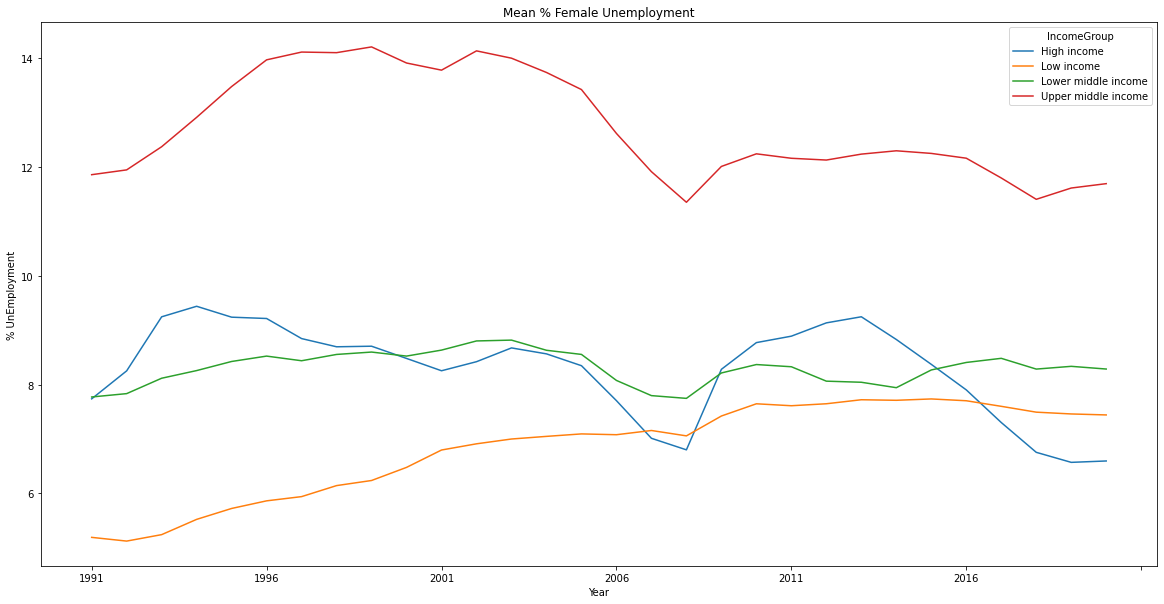

In [ ]:
transpose_income_group.plot(figsize=(20,10))
plt.title("Mean % Female Unemployment")
plt.xlabel("Year")
plt.ylabel("% UnEmployment")

Text(0, 0.5, '% UnEmployment')

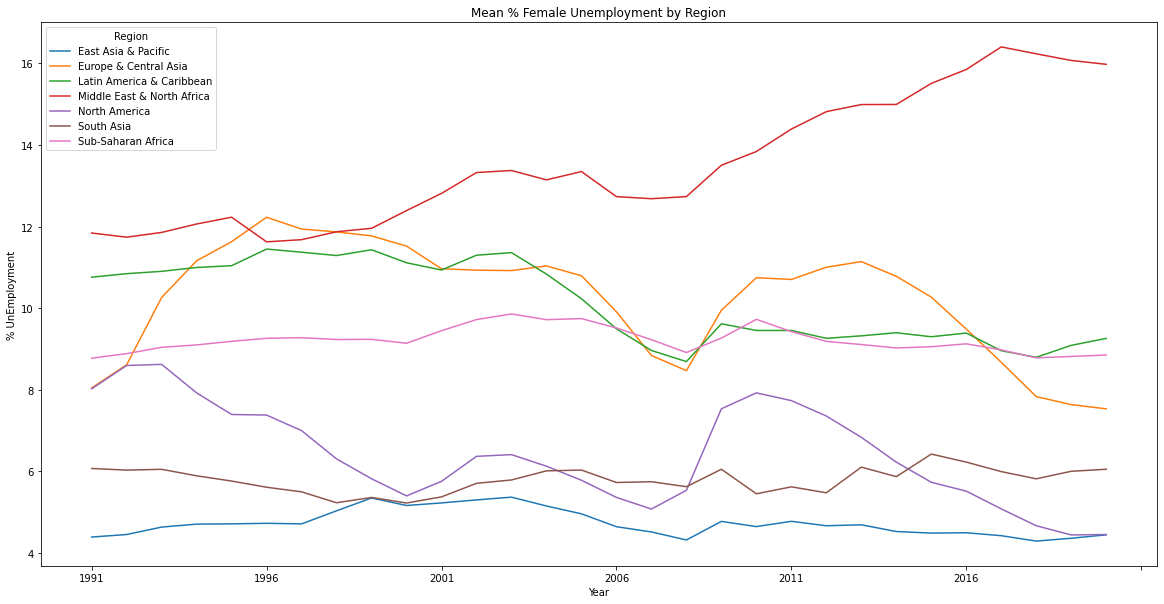

In [ ]:
grouped_data_region = merged_data_clean.groupby(['Region']).describe()
grouped_data_region = merged_data_clean.groupby(['Region']).mean()
transposed_region = grouped_data_region.transpose()
transposed_region.plot(figsize=(20,10))
plt.title('Mean % Female Unemployment by Region')
plt.xlabel('Year')
plt.ylabel("% UnEmployment")

##ANOVA

In [ ]:
import scipy.stats as stats

In [ ]:
merged_data_clean.head()

Country Name  ...          IncomeGroup
1           Afghanistan  ...           Low income
2                Angola  ...  Lower middle income
3               Albania  ...  Upper middle income
6  United Arab Emirates  ...          High income
7             Argentina  ...  Upper middle income

[5 rows x 34 columns]

##Income Groups and the length

In [ ]:
income_groups = merged_data_clean['IncomeGroup'].unique()
print(income_groups)
len(income_groups)

['Low income' 'Lower middle income' 'Upper middle income' 'High income']


4

###Verification of Number of countries

In [ ]:
from IPython.display import display
with pd.option_context('display.max_rows', 299, 'display.max_columns', 40):
    display(merged_data_clean) #need display to show all data
 

In [ ]:
#how many partipant countries
CC_countries = merged_data_clean['Country Code'].unique()
print(CC_countries)
print(len(CC_countries)) 

['AFG' 'AGO' 'ALB' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN'
 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BRB' 'BRN'
 'BTN' 'BWA' 'CAF' 'CAN' 'CHE' 'CHI' 'CHL' 'CHN' 'CIV' 'CMR' 'COD' 'COG'
 'COL' 'COM' 'CPV' 'CRI' 'CUB' 'CYP' 'CZE' 'DEU' 'DJI' 'DNK' 'DOM' 'DZA'
 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'GAB' 'GBR' 'GEO'
 'GHA' 'GIN' 'GMB' 'GNB' 'GNQ' 'GRC' 'GTM' 'GUM' 'GUY' 'HKG' 'HND' 'HRV'
 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JOR'
 'JPN' 'KAZ' 'KEN' 'KGZ' 'KHM' 'KOR' 'KWT' 'LAO' 'LBN' 'LBR' 'LBY' 'LCA'
 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MDA' 'MDG' 'MDV' 'MEX' 'MKD'
 'MLI' 'MLT' 'MMR' 'MNE' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NCL'
 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL'
 'PNG' 'POL' 'PRI' 'PRK' 'PRT' 'PRY' 'PSE' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA'
 'SAU' 'SDN' 'SEN' 'SGP' 'SLB' 'SLE' 'SLV' 'SOM' 'SRB' 'SSD' 'STP' 'SUR'
 'SVK' 'SVN' 'SWE' 'SWZ' 'SYR' 'TCD' 'TGO' 'THA' 'T

### From the dataser only 2 columns are selected

In [ ]:

CC_IG = merged_data_clean[['Country Code','IncomeGroup']]
print(CC_IG)
print(len(CC_IG))


    Country Code          IncomeGroup
1            AFG           Low income
2            AGO  Lower middle income
3            ALB  Upper middle income
6            ARE          High income
7            ARG  Upper middle income
..           ...                  ...
257          WSM  Upper middle income
259          YEM           Low income
260          ZAF  Upper middle income
261          ZMB  Lower middle income
262          ZWE  Lower middle income

[187 rows x 2 columns]
187


###This is to check the countries are not repited

In [ ]:
CC_IG_GP= CC_IG.groupby(['Country Code']).describe()
print(CC_IG_GP)
print(len(CC_IG_GP))


             IncomeGroup                                 
                   count unique                  top freq
Country Code                                             
AFG                    1      1           Low income    1
AGO                    1      1  Lower middle income    1
ALB                    1      1  Upper middle income    1
ARE                    1      1          High income    1
ARG                    1      1  Upper middle income    1
...                  ...    ...                  ...  ...
WSM                    1      1  Upper middle income    1
YEM                    1      1           Low income    1
ZAF                    1      1  Upper middle income    1
ZMB                    1      1  Lower middle income    1
ZWE                    1      1  Lower middle income    1

[187 rows x 4 columns]
187


In [ ]:
IG_IG_GP= CC_IG.groupby(['IncomeGroup']).describe()
print(IG_IG_GP)
print(len(IG_IG_GP))


                    Country Code                 
                           count unique  top freq
IncomeGroup                                      
High income                   60     60  BEL    1
Low income                    29     29  NER    1
Lower middle income           48     48  TUN    1
Upper middle income           50     50  TKM    1
4


In [ ]:
CC_IG_2019 = merged_data_clean[['Country Code','2019','IncomeGroup']]
print(CC_IG_2019)
print(len(CC_IG_2019))

    Country Code       2019          IncomeGroup
1            AFG  14.004000           Low income
2            AGO   6.942000  Lower middle income
3            ALB  11.604000  Upper middle income
6            ARE   6.046000          High income
7            ARG  10.922000  Upper middle income
..           ...        ...                  ...
257          WSM   9.837000  Upper middle income
259          YEM  24.879999           Low income
260          ZAF  30.334999  Upper middle income
261          ZMB  12.237000  Lower middle income
262          ZWE   5.458000  Lower middle income

[187 rows x 3 columns]
187


In [ ]:
import statistics
grouped_data_income = merged_data_clean.groupby(['IncomeGroup']).mean()
grouped_data_income
#grouped_data_income_2019= grouped_data_income(['2019'])
#Data2019=merged_data_clean['2019']
#mode = statistics.mode(transpose_income_group.groupby([]))
#print(mode)

1991       1992  ...       2019       2020
IncomeGroup                                ...                      
High income           7.736467   8.250783  ...   6.569350   6.594800
Low income            5.191034   5.122586  ...   7.458897   7.440862
Lower middle income   7.770750   7.832417  ...   8.333917   8.284333
Upper middle income  11.855680  11.943880  ...  11.610500  11.690940

[4 rows x 30 columns]

In [ ]:
income_groups
print(income_groups)
income_groups[0]
for income_group in income_groups:
  print(income_group)
   

['Low income' 'Lower middle income' 'Upper middle income' 'High income']
Low income
Lower middle income
Upper middle income
High income


In [ ]:
income_group_data=[]
for i in range (len(income_groups)):
  income_group_data.append(merged_data_clean['2019'][merged_data_clean['IncomeGroup']==income_groups[i]])

In [ ]:
income_group_data

[1      14.004000
 14      1.009000
 17      9.223000
 32      3.565000
 41      3.404000
 67      4.953000
 70      2.756000
 83      3.316000
 84     12.237000
 85      2.210000
 98     16.693001
 128     2.224000
 148     1.846000
 155     7.954000
 162     3.453000
 165     6.617000
 170     0.360000
 190     2.331000
 200     1.070000
 203    27.768999
 207     3.628000
 210    11.079000
 213    13.406000
 224    20.837000
 226     1.706000
 229     1.547000
 231     9.935000
 244     2.296000
 259    24.879999
 Name: 2019, dtype: float64, 2       6.942000
 16      2.336000
 18      6.204000
 26      3.809000
 30      3.200000
 39      3.772000
 40      3.872000
 42     10.105000
 44      4.702000
 45     11.491000
 54     10.402000
 58     21.080000
 65     22.150000
 81      4.464000
 95      7.003000
 107     5.233000
 118     2.800000
 119     7.467000
 120     0.824000
 126     0.569000
 135     6.687000
 138    27.118000
 145    10.415000
 147     4.155000
 157     2.074000


In [ ]:
statistic, pvalue = stats.f_oneway(income_group_data[0],
                                   income_group_data[1],
                                   income_group_data[2],
                                   income_group_data[3])
print("statistic: %s pvalue %s" %(statistic,pvalue))

statistic: 5.052886221006664 pvalue 0.0021894356280740147


In [ ]:
regions = merged_data_clean['Region'].unique()
print(regions)


regions_data=[]
for i in range (len(regions)):
  regions_data.append(merged_data_clean['2019'][merged_data_clean['Region']==regions[i]])



statistic, pvalue = stats.f_oneway(regions_data[0],
                                   regions_data[1],
                                   regions_data[2],
                                   regions_data[3],regions_data[4],
                                   regions_data[5],regions_data[6])
print("statistic: %s pvalue %s" %(statistic,pvalue))


['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']
statistic: 7.031185985789595 pvalue 9.75436578876421e-07


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


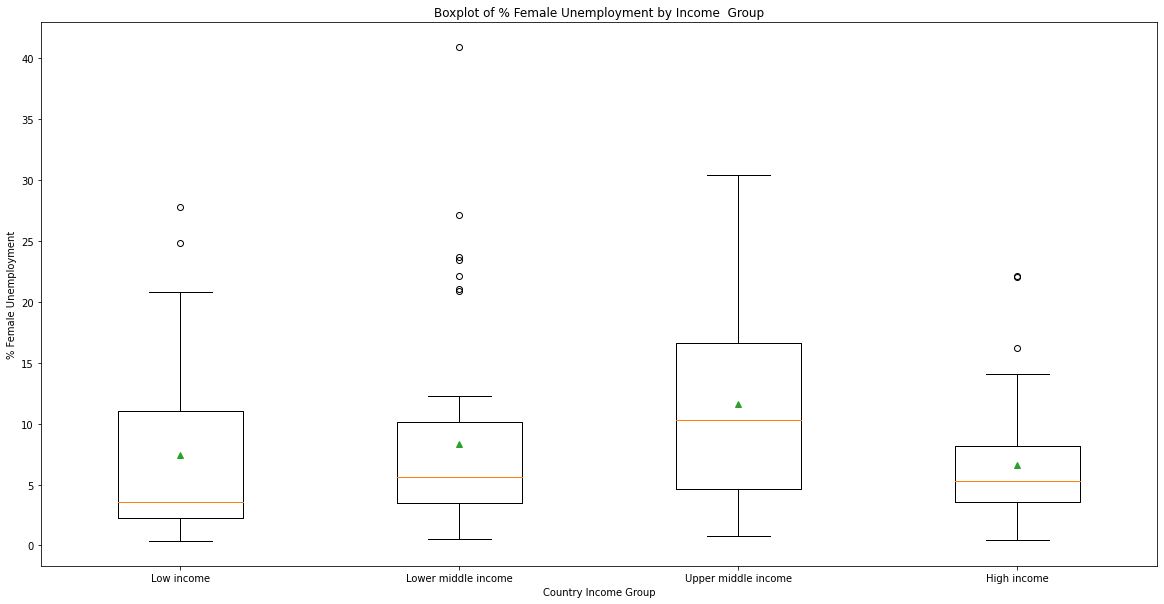

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_title("Boxplot of % Female Unemployment by Income  Group")
ax.set
ax.boxplot(income_group_data, labels = income_groups, showmeans =True)
plt.xlabel("Country Income Group")
plt.ylabel("% Female Unemployment")
plt.show()

###Median is the orange line in graph above
###The mean for each group is the green triangle

# **ANOVA Step by Step**

##Defining ANOVA

Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. 
ANOVA checks the impact of one or more factors by comparing the means of different samples.
 [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/#:~:text=Analysis%20of%20variance%20(ANOVA)%20is,the%20means%20of%20different%20samples.&text=Another%20measure%20to%20compare%20the%20samples%20is%20called%20a%20t%2Dtest)


###Objective

In our case, the impact of the factor Income Group to the different means of the % Female Unemployment will be analysed. 

##Hypotesis testing in ANOVA:

[Hypothesis Testing - Analysis of Variance (ANOVA)](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ANOVA/BS704_HypothesisTesting-Anova_print.html)


The null hypothesis in ANOVA is always that there is no difference in means.

H0: mu1=mu2=mu3=mu4

The alternative hypothesis is always that the means are not all equal 

H1: means are not all equal

###Test Statistic for ANOVA
The test statistic for testing H0: μ1 = μ2 = ... =   μk is:

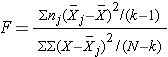

And follows the table of calculations:

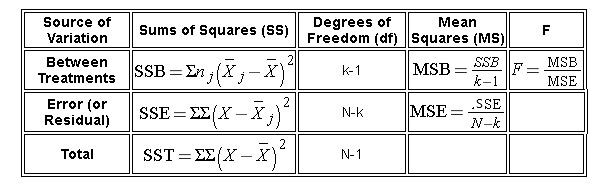




# ANOVA Step By Step

Assumptions while calculating test statisitic F:
- Equal variability in the 4 income groups (e.g population variances are equal s1^2 = s2^2 = s3^2= s4^2


##Sample Data
Groups are the income groups: IG1, IG2, IG3, IG4

Sample Size for each group: n1 =60, n2=29, n3=48,n4=50

Sample mean: mu1, mu2, mu3, mu4

Sample standard deviation: s1,s2,s3,s4






###Preparing all sample data (K= number of samples, N=population, degrees of freedom 1 and 2

In [ ]:
k=len(pd.unique(merged_data_clean.IncomeGroup)) 
N=len(merged_data_clean.values) 
#Degrees of Freedom Between Treatments
df1= k-1
#Degrees of Freedom within Treatments
df2 = N-k
#Total Degrees of Freedom
dfT=N-1
print(k,N, df1, df2, dfT)


4 187 3 183 186


###Calculating the populations of each income group and N 

In [ ]:
n0=merged_data_clean.groupby('IncomeGroup').size()[0]  
n1=merged_data_clean.groupby('IncomeGroup').size()[1]  
n2=merged_data_clean.groupby('IncomeGroup').size()[2] 
n3=merged_data_clean.groupby('IncomeGroup').size()[3] 
N=n0+n1+n2+n3
print(n0,n1,n2,n3,n0+n1+n2+n3)


60 29 48 50 187


In [ ]:
grandmu=(merged_data_clean['2019'].sum()/N)
print(grandmu)

8.50813905424613


###Sum of Squares Between Samples
We start by calculating the Sum of Squares between. Sum of Squares Between is the variability due to interaction between the groups. Sometimes known as the Sum of Squares of the Model.

In [ ]:
print(n0,n1,n2,n3)
merged_data_clean_IG_2019=merged_data_clean[['2019','IncomeGroup']]
IG0=merged_data_clean_IG_2019[merged_data_clean_IG_2019['IncomeGroup']=='High income']
IG1=merged_data_clean_IG_2019[merged_data_clean_IG_2019['IncomeGroup']=='Low income']
IG2=merged_data_clean_IG_2019[merged_data_clean_IG_2019['IncomeGroup']=='Lower middle income']
IG3=merged_data_clean_IG_2019[merged_data_clean_IG_2019['IncomeGroup']=='Upper middle income']

IG0mu_2=((sum(IG0['2019']))/n0)
IG1mu_2=((sum(IG1['2019']))/n1)
IG2mu_2=((sum(IG2['2019']))/n2)
IG3mu_2=((sum(IG3['2019']))/n3)

SSB= n0*(IG0mu_2 -grandmu )**2 + n1*(IG1mu_2-grandmu)**2 + n2*(IG2mu_2-grandmu)**2 + n3*(IG3mu_2-grandmu)**2
SSB


60 29 48 50


740.1497027860728

### Mean Square for SSB

In [ ]:
MSSB= SSB/df1
MSSB

246.7165675953576

###How to Calculate the Sum of Squares Within
The variability in the data due to differences within each group.

In [ ]:
import statistics
IG0_ss=statistics.pvariance(IG0['2019'])
IG1_ss=statistics.pvariance(IG1['2019'])
IG2_ss=statistics.pvariance(IG2['2019'])
IG3_ss=statistics.pvariance(IG3['2019'])
#this calculation was not included in SSW. it didnt result in an accurate 

In [ ]:
def variance(datav, ddof=1):
      n = len(datav)
      mean = sum(datav) / n
      return sum((x - mean) ** 2 for x in datav) / (n - ddof)
IG0_sss=variance(IG0['2019'])
IG1_sss=variance(IG1['2019'])
IG2_sss=variance(IG2['2019'])
IG3_sss=variance(IG3['2019'])

In [ ]:
SSW=(n0-1)*IG0_sss +(n1-1)*IG1_sss +(n2-1)*IG2_sss +(n3-1)*IG3_sss 
SSW

8935.315361396688

### Mean Square for SSW

In [ ]:
MSSW = SSW/df2
MSSW

48.826859898342555

##Calculating the F-value

In [ ]:
F=MSSB/MSSW
F

5.0528862210066565

###Calculating p

In [ ]:
from scipy import stats
p= stats.f.sf(F,dfT, df2)
p

8.001863810066076e-26

#Interpretation of F

One rejects the the null hypothesis, H0
, if the computed F-static is greater than the critical F-statistic. The critical F-statistic is determined by the degrees of freedom and alpha value. 
In our case, 1-tailed , alpha= 0,05, dof =  186 so critical F = 2.347

Reject H0 if calulated F-statistics > critical F-statistic: 5.05 > 2.347

We reject the null hypothesis H0 because p<= 0.05

The % of Female Unemployment rate was measured across different income groups. 

The purpose of calculating ANOVA was to see if averages of the values of % of Female Unemployment across the different Income Groups were statistically different.

We can now report that Income Group factor greatly alters the average of the % Female Unployment rate for the year 2019.


In [ ]:
!pip install researchpy

In [ ]:
import researchpy as rp
rp.summary_cont(merged_data_clean['2019'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Variable      N    Mean      SD      SE  95% Conf.  Interval
0     2019  187.0  8.5081  7.2124  0.5274     7.4676    9.5486

In [ ]:
rp.summary_cont(merged_data_clean_IG_2019.groupby(merged_data_clean_IG_2019['IncomeGroup']))

2019                                            
                       N     Mean      SD      SE 95% Conf. Interval
IncomeGroup                                                         
High income           60   6.5694  4.3386  0.5601    5.4486   7.6901
Low income            29   7.4589  7.4468  1.3828    4.6263  10.2915
Lower middle income   48   8.3339  8.2012  1.1837    5.9525  10.7153
Upper middle income   50  11.6105  7.9678  1.1268    9.3461  13.8749

###Calculation of Sum of Squares Total
Sum of Squares Total will be needed to calculate eta-squared later. This is the total variability in the data:

In [ ]:
SStotal = SSB+SSW
SStotal

9675.465064182761

#ANOVA with Pingouin 
Install the library

In [ ]:
#One-Way ANOVA 
!pip install pingouin
import pingouin as pg

     |████████████████████████████████| 225kB 8.6MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221687 sha256=c5385ed72fa4431562a35e1d99254d3006bd79ada10cc1ae78372b68d9eb26d1
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=ae6560e666dbad724e1dc3efdaacb1e5d07b82377b959b3e95497ffb169e871c
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=db56e5f1a155f8fc0cbec4668f10f2a1a3443c9d2038212b240a0d64d9a1829a
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


###ANOVA Table to study variability of the data (between and within samples)

In [ ]:
aov= pg.anova(dv='2019', between='IncomeGroup',data= merged_data_clean,detailed=True)
aov

Source           SS   DF          MS         F     p-unc       np2
0  IncomeGroup   740.149703    3  246.716568  5.052886  0.002189  0.076498
1       Within  8935.315361  183   48.826860       NaN       NaN       NaN

the impact of the factor Region to the different means of the % Female Unemployment

In [ ]:
aov= pg.anova(dv='2019', between='Region',data= merged_data_clean,detailed=True)
aov

Source           SS   DF          MS         F         p-unc       np2
0  Region  1837.100070    6  306.183345  7.031186  9.754366e-07  0.189872
1  Within  7838.364994  180   43.546472       NaN           NaN       NaN

#Creating a Worldmap with Folium

What follows next is unpivoting the main.data from wide to long format, optionally leaving identifiers set using melt function. One column has all the identifiers that later on, we will be selecting only one identifier % Female Unemployement and only one year 2019 of data from the column 'Year'.

In [ ]:
main_data_m=main_data.melt(id_vars=['Country Code', 'Indicator Name'],value_vars=['1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
main_data_m.head()

main_data_m= main_data_m.rename(columns={'variable': 'Year'})

main_data_m.head()
main_data_m_clean=main_data_m.dropna()
main_data_m_clean.head()

Country Code  ...      value
0           ABW  ...  68.523104
1           ABW  ...  24.084677
78          ABW  ...   5.000000
82          ABW  ...   7.186510
83          ABW  ...   9.047520

[5 rows x 4 columns]

In [ ]:
import pandas as pd
import folium
import csv
import json


In [ ]:
stage = main_data_m_clean
stage



Country Code  ...      value
0                ABW  ...  68.523104
1                ABW  ...  24.084677
78               ABW  ...   5.000000
82               ABW  ...   7.186510
83               ABW  ...   9.047520
...              ...  ...        ...
1282884          ZWE  ...  50.859818
1282956          ZWE  ...   6.000000
1282969          ZWE  ...  13.000000
1283012          ZWE  ...   7.000000
1283019          ZWE  ...   6.000000

[546123 rows x 4 columns]

In [ ]:
main_data_m_clean_year=main_data_m_clean[main_data_m_clean['Year']=='2019']
main_data_m_clean_year_ind=main_data_m_clean_year[main_data_m_clean_year['Indicator Name']=='Unemployment, female (% of female labor force) (modeled ILO estimate)']
main_data_m_clean_year_ind

Country Code  ...      value
1197670          AFG  ...  14.004000
1197832          AGO  ...   6.942000
1197994          ALB  ...  11.604000
1198318          ARB  ...  19.954200
1198480          ARE  ...   6.046000
...              ...  ...        ...
1239304          WSM  ...   9.837000
1239628          YEM  ...  24.879999
1239790          ZAF  ...  30.334999
1239952          ZMB  ...  12.237000
1240114          ZWE  ...   5.458000

[233 rows x 4 columns]

In [ ]:
data_to_plot = main_data_m_clean_year_ind[['Country Code','value']]
data_to_plot['Country Code'].unique()

array(['AFG', 'AGO', 'ALB', 'ARB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA',
       'CAF', 'CAN', 'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR',
       'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CYP',
       'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR', 'EAS',
       'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH',
       'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GTM', 'GUM', 'GUY', 'HIC',
       'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA',
       'IDB', 'IDN', 'IDX', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR',
       'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC',
       'LIC', 'LKA', 'LMC', 'LMY', 'LSO', 'LTE', 'LTU', 'LUX', 'LVA',
       'MAC', 'MAR',

In [ ]:
data_to_plot

Country Code      value
1197670          AFG  14.004000
1197832          AGO   6.942000
1197994          ALB  11.604000
1198318          ARB  19.954200
1198480          ARE   6.046000
...              ...        ...
1239304          WSM   9.837000
1239628          YEM  24.879999
1239790          ZAF  30.334999
1239952          ZMB  12.237000
1240114          ZWE   5.458000

[233 rows x 2 columns]

In [ ]:
hist_indicator = main_data_m_clean_year_ind.iloc[0]['Indicator Name']
hist_indicator

'Unemployment, female (% of female labor force) (modeled ILO estimate)'

In [ ]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
wc=r'world_countries.json'

In [ ]:
world1 = folium.Map(location=[0, 0], zoom_start=2)


 ### Choropleth maps bind Pandas Data Frames and json geometries.

In [ ]:
world1.choropleth(geo_data =wc ,
                data = data_to_plot,
                columns = 
['Country Code', 'value'],

key_on='feature.id',
fill_color = 'YlOrRd',
                  fill_opacity =0.8 ,
                  line_opacity = 0.1,
legend_name ='%Female Unemployment')
world1

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


The darker is the color, the higher is the % Unemployment 

###Tiles will be added to the water to make the map more realistic

In [ ]:
world = folium.Map(location=[0, 0], zoom_start=2, tiles = 'stamenwatercolor')
world.choropleth(geo_data =wc ,
                data = data_to_plot,
                columns = 
['Country Code', 'value'],

key_on='feature.id',
fill_color = 'YlOrRd',
                  fill_opacity =0.8 ,
                  line_opacity = 0.1,
legend_name ='%Female Unemployment')
world

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


A Tile control has been added on the top right of the map. 

In [ ]:

worlds = folium.Map(location=[0, 0], zoom_start=2, tiles = 'cartodbpositron')


worlds.choropleth(geo_data =wc ,
                data = data_to_plot,
                columns = 
['Country Code', 'value'],

key_on='feature.id',
fill_color = 'YlOrRd',
                  fill_opacity =0.8 ,
                  line_opacity = 0.1,
legend_name ='%Female Unemployment')
folium.TileLayer('Stamen Terrain').add_to(worlds)
folium.TileLayer('Stamen Toner').add_to(worlds)
folium.TileLayer('Stamen Water Color').add_to(worlds)
folium.TileLayer('cartodbpositron').add_to(worlds)
folium.TileLayer('cartodbdark_matter').add_to(worlds)
folium.LayerControl().add_to(worlds)
worlds

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
worldss = folium.Map(location = [0,0], zoom_start=2,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(worldss)


Change the length of the colorcodes in the color bar

In [ ]:
myscale = (data_to_plot['value'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
worldss.choropleth(
 geo_data=wc,
 name='Choropleth',
 data=data_to_plot,
 columns=['Country Code','value'],
 key_on="feature.id",
 fill_color='YlGnBu',
 threshold_scale=myscale,
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='% Female Unemployment ',
 smooth_factor=0
)
worldss

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Prepare Data Label and Display on Map when Hovering

In [ ]:

!pip install geopandas
import geopandas as gpd
import folium
import branca.colormap as cm
wc=r'world_countries.json'
data_url = r'countries.geojson'
data_url = 'https://datahub.io/core/geo-countries/datapackage.json'


     |████████████████████████████████| 972kB 8.9MB/s 
     |████████████████████████████████| 14.8MB 317kB/s 
     |████████████████████████████████| 6.5MB 19.7MB/s 


In [ ]:
fname =r'world_countries.json'
worldc = gpd.read_file(fname)
worldc.columns

Index(['id', 'name', 'geometry'], dtype='object')

In [ ]:
worldc

id  ...                                           geometry
0    AFG  ...  POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1    AGO  ...  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...
2    ALB  ...  POLYGON ((20.59025 41.85540, 20.46317 41.51509...
3    ARE  ...  POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4    ARG  ...  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...
..   ...  ...                                                ...
172  PSE  ...  POLYGON ((35.54566 32.39399, 35.54525 31.78251...
173  YEM  ...  POLYGON ((53.10857 16.65105, 52.38521 16.38241...
174  ZAF  ...  POLYGON ((31.52100 -29.25739, 31.32556 -29.401...
175  ZMB  ...  POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...
176  ZWE  ...  POLYGON ((31.19141 -22.25151, 30.65986 -22.151...

[177 rows x 3 columns]

In [ ]:
worldc_data=worldc[['id', 'name','geometry']]
worldc_data.head()

id                  name                                           geometry
0  AFG           Afghanistan  POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1  AGO                Angola  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...
2  ALB               Albania  POLYGON ((20.59025 41.85540, 20.46317 41.51509...
3  ARE  United Arab Emirates  POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4  ARG             Argentina  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...

In [ ]:
worldc_datar = worldc_data.rename(columns = {'id': 'Country Code'}, inplace = False)
worldc_datar 

Country Code  ...                                           geometry
0            AFG  ...  POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1            AGO  ...  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...
2            ALB  ...  POLYGON ((20.59025 41.85540, 20.46317 41.51509...
3            ARE  ...  POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4            ARG  ...  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...
..           ...  ...                                                ...
172          PSE  ...  POLYGON ((35.54566 32.39399, 35.54525 31.78251...
173          YEM  ...  POLYGON ((53.10857 16.65105, 52.38521 16.38241...
174          ZAF  ...  POLYGON ((31.52100 -29.25739, 31.32556 -29.401...
175          ZMB  ...  POLYGON ((32.75937 -9.23060, 33.23139 -9.67672...
176          ZWE  ...  POLYGON ((31.19141 -22.25151, 30.65986 -22.151...

[177 rows x 3 columns]

In [ ]:
data_to_plot

Country Code      value
1197670          AFG  14.004000
1197832          AGO   6.942000
1197994          ALB  11.604000
1198318          ARB  19.954200
1198480          ARE   6.046000
...              ...        ...
1239304          WSM   9.837000
1239628          YEM  24.879999
1239790          ZAF  30.334999
1239952          ZMB  12.237000
1240114          ZWE   5.458000

[233 rows x 2 columns]

In [ ]:
world_datad=pd.merge(worldc_datar, data_to_plot, on='Country Code')
world_datadc=world_datad[['name','Country Code','geometry','value']]
world_datadc

name  ...      value
0             Afghanistan  ...  14.004000
1                  Angola  ...   6.942000
2                 Albania  ...  11.604000
3    United Arab Emirates  ...   6.046000
4               Argentina  ...  10.922000
..                    ...  ...        ...
162             West Bank  ...  40.945000
163                 Yemen  ...  24.879999
164          South Africa  ...  30.334999
165                Zambia  ...  12.237000
166              Zimbabwe  ...   5.458000

[167 rows x 4 columns]

In [ ]:
world_datado=world_datad[['name','Country Code','geometry', 'value' ]]
world_datado.head()

name  ...   value
0           Afghanistan  ...  14.004
1                Angola  ...   6.942
2               Albania  ...  11.604
3  United Arab Emirates  ...   6.046
4             Argentina  ...  10.922

[5 rows x 4 columns]

In [ ]:
 world_datado['Country Code'].unique().shape
world_datado.isna().shape
world_datadoo=world_datado.dropna()
world_datadoo['Country Code'].unique().shape

(167,)

In [ ]:
myscale = (world_datado['value'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
worldss = folium.Map(location=[5,5], zoom_start=2,tiles=None, control_scale=True)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(worldss)




In [ ]:
#makes boundaries plot
Boundaries = folium.GeoJson(
    worldc,
    style_function = lambda x: {
        'color': 'black',
        'weight': 1,
        "opacity":1,
        'fillOpacity': 0,
    }).add_to(worldss)

###Colormap

In [ ]:
colormap = cm.linear.YlGnBu_03.to_step(data=world_datado['value'], 
           method='quant', quantiles=[0,0.1,0.75,0.9,0.98,1])
colormap

###Data for each country is displayed by hovering the mouse over the map
Black means no data

In [ ]:
#worldss = folium.Map(location=[5,5], zoom_start=2,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(worldss)
colormap.caption = "% Female Unemployment"
style_function = lambda x: {'fillColor': colormap(x['properties']['value']), 
                            'color':'#000000', 
                            'fillOpacity': 10, 
                            'weight': 2}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 1, 
                                'weight': 1}

NIL = folium.features.GeoJson(
    world_datado,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','value'],
        aliases=['Country Name: ','% Female Unemployment'],
        localize = True,
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
worldss.add_child(NIL)
worldss.keep_in_front
#folium.LayerControl().add_to(worldss)
worldss

In [ ]:
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(worldss)
colormap.caption = "% Female Unemployment"
style_function = lambda x: {'fillColor': colormap(x['properties']['value']), 
                            'color':'#000000', 
                            'fillOpacity': 2, 
                            'weight': 1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 1, 
                                'weight': 1}

NIL = folium.features.GeoJson(
    world_datado,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','value'],
        aliases=['Country Name: ','% Female Unemployment'],
        localize = True,
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
worldss.add_child(NIL)
worldss.keep_in_front
folium.TileLayer('Stamen Terrain').add_to(worlds)
folium.TileLayer('Stamen Toner').add_to(worlds)
folium.TileLayer('Stamen Water Color').add_to(worlds)
folium.TileLayer('cartodbpositron').add_to(worlds)
folium.TileLayer('cartodbdark_matter').add_to(worlds)
folium.LayerControl().add_to(worldss)
worldss